In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("/content/sample_data/GOOG.csv") 
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1.262000e+03
mean,982.884677,991.980983,974.031114,983.451723,983.451723,1.723477e+06
std,231.644952,234.464420,229.580341,232.283568,232.283568,8.638005e+05
min,519.500000,522.734009,515.179993,516.830017,516.830017,3.475000e+05
25%,769.570007,774.500000,764.652511,769.252502,769.252502,1.212700e+06
50%,1020.130005,1034.104981,1008.305023,1021.044983,1021.044983,1.488950e+06
75%,1159.880005,1174.482544,1150.543488,1163.472442,1163.472442,1.964575e+06
max,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,1.116490e+07


In [ ]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-06-08,526.830017
1,2015-06-09,526.690002
2,2015-06-10,536.690002
3,2015-06-11,534.609985
4,2015-06-12,532.330017


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


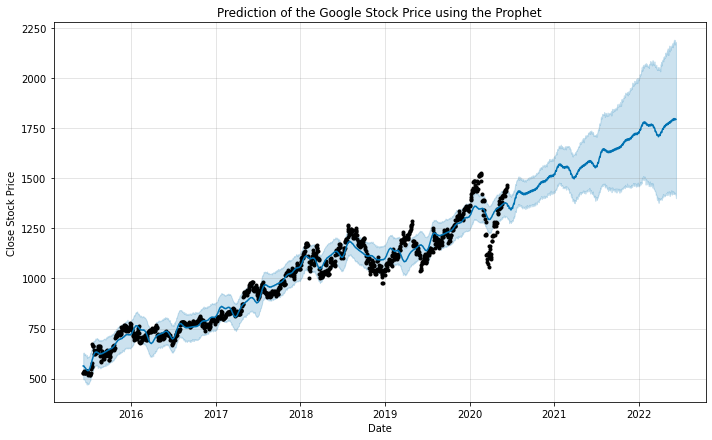

In [ ]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

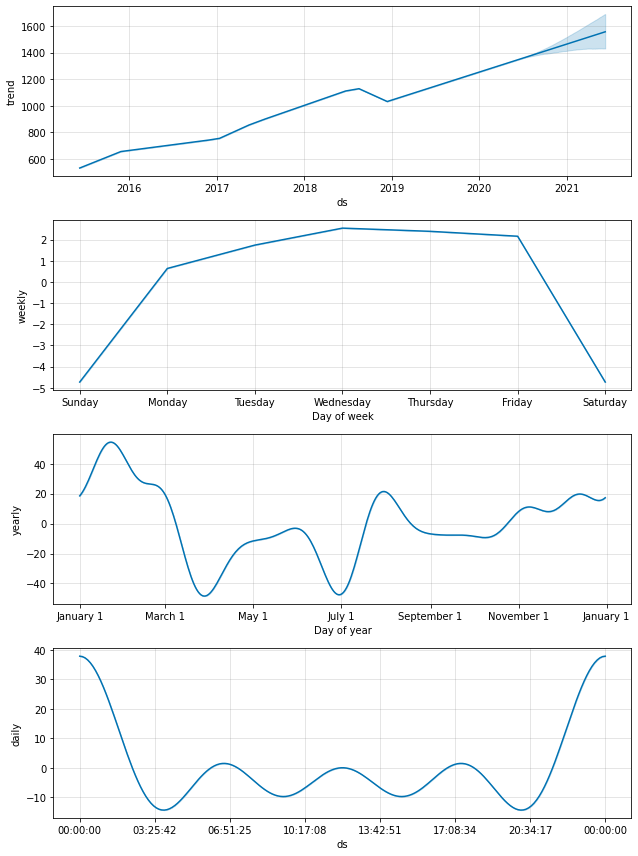

In [ ]:
m.plot_components(prediction)
plt.show()